<a href="https://colab.research.google.com/github/LydiaFrance/PythonStats/blob/main/Statistics_with_Python_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics with Python


## Why would you choose to use Python for stats?

It is down to personal preference! If you do a lot of difficult analyses and only a few statistical methods, it may make sense to mostly use Python. If you are only running stats models, you may prefer to use R.

You don't even need to choose between them. As long as your data is in a universal format, you can read in your data into R and run tests, then go back to using Python.

# Using Python on Datasets

You have just finished your Python course, and so this class is a chance to review what you learnt while looking at datasets.

This lesson will focus on Pandas, plotting with matplotlib and seaborn, and then looking at a few examples of statistical tests.

However! I will also be discussing how to make sure your data pipeline and workflow is **reproducible** and follows best practices.




# Bigger Picture -- Reproducible Data Pipeline


![](https://the-turing-way.netlify.app/_images/reproducibility.jpg)

When you go on to do real scientific research, you should do everything you can to prevent contributing to the reproducibility crisis.


## What is it?

Papers are published without data or code, and without showing how their results are generated. It means a lot of findings are wrong and no one can check them. By treating your computational methods like you would a lab protocol, other people can cite your code and data, it can open up new collaborations.

And, most importantly, it means you'll still be able to run code at the end of your PhD that you wrote at the beginning.

The Turing Way is a huge resource being built to help researchers make reproducible data and code. Check it out!

I will have some asides throughout today's lesson about best practices for when you do these things in real life rather than a lesson.

![](https://the-turing-way.netlify.app/_images/evolution-open-research.jpg)




## Starting Point

If you are using Python on your personal computer then we need to do some important steps before we continue. Firstly you want to make a directory (folder) and subdirectories.

```
ProjectFolder/
--- functions/
--- data/
--- figures/
- README.md
- run_analysis.ipynb

```

And make sure that if you're using your own notebook (or `.py` file) then it sits inside this directory.

This is the beginning of your very own Python package. By writing it like this, you can release it for others with your publications.




### Note about Environments

If you are interested in reproducible best practices then I recommend looking up "Python Environments". This means that there's a record of every python package your work is dependent on, and if someone wants to run your work on their computer, they can make sure they have all the right packages with the right versions (and so your code will run in 5 years time!)

If you are working on your computer with Python in the future, you can do this with `conda` or `poetry` or `pyenv`. For this lesson don't worry!



### Note about Version Control

![](https://the-turing-way.netlify.app/_images/project-history.jpg)

Once you have your directories, the best practice at this point is to initialise git. Making sure your new directory has version control and is visible to you on GitHub.

When you make changes to your code, rather than just saving to your local computer, you can also make commits and push them, which means you have a complete timeline of everything you have done to your code.


# Loading Data

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="Drawing" style="width: 400px;"/>

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" alt="Drawing" style="width: 350px;"/>

We're going to be using a publicly available dataset called Palmer Penguins, which contains morphological measurements from three species of penguin.

First we need to load some libraries that we will need for the rest of the class. I will also make sure there are some settings in place to improve the way the plotting looks in a notebook.

### `01`


Now we will load our data from the package `palmerpenguins`.


### `02`

### Best Practices!

Save your raw data!

You should save your raw data immediately to your subfolder `data/`. This file in `.csv` format can be treated as "read-only". We want a record of the data as we received it and before the pipeline began. That means we can redo all the steps with complete transparency. It also means you have a backup in case you overwrite your data when you're analysing and cleaning it.





# Exploring the Data with Pandas

![](https://repository-images.githubusercontent.com/201442635/6a23c400-501b-11eb-9089-4489ae2e79d1)

We want to have a quick overview of the data.


### `03`

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### What is going on here?

This variable `penguins` is an example of a Pandas Dataframe.

Dataframes have a number of useful methods and attributes, and we call them by starting with the name of the dataframe variable, and then a full-stop, and then the method name. Methods have round brackets after them.

For example, penguins.head() method and penguins.describe() method. Try out the following on the penguins dataframe to see what they do:


### `04`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


 Dataframes also have attributes, which are like variables that are attached to the dataframe.

For example, the shape attribute tells us the number of rows and columns in the dataframe.

Attributes don't have round brackets after them.

Try these:

### `05`

2752

Panda dataframes also have very simple plotting methods inbuilt. We will use more advanced plotting libraries later, but for now...

### `06`

Pandas helps us easily subset the data.

If we want a single column, we can use the following syntax:

### `07`

The square brackets are used to select a column from the dataframe. The column name is inside the square brackets, and it is a string, so it is inside quotes.

You can use `.columns` attribute to find out what column names exist.

To select the first row, we can use the following syntax:

### `08`


**Important Note! Python is zero indexed, which means the first row is 0**

`.loc` uses an integer to find the row you're interested in. (So the integer is not inside quotes).

You'll notice the result is the row printed from top to bottom, with the column names on the left.

The colon means we want every row. If we just want a specific row, we can use the following syntax:

### `09`

You can also use the `iloc` method if you want to call a column by number and not the name.

### Best Practices Note!!!
Referring to columns with English words makes your code much easier to read.

### `10`



We can also use a list to subset the data. Lists in Python are surrounded by square brackets.

You can have a list of numbers, or strings.

A range of numbers is usually more helpful.

### `11`


When we select one column,the result is a `series`, and when there's more than one column, the result is a `dataframe`. They print differently.  

Our first challenge is to plot a single species.

### `12`


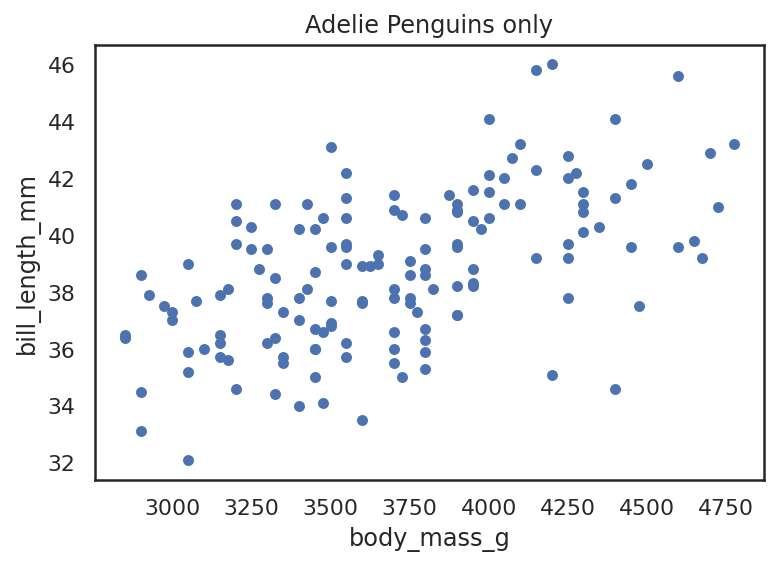

What is printed is a column of `True` and `False` values. This is known as a boolean mask. It tells us whether each row in that column fulfills the conditional statement.

We're going to store this as a new variable.

Note! `=` is different to `==`.

We can use a boolean mask to only select the rows that are true. Which is an important aspect of subseting data.

### `13`

We can actually do this on one line without needing to save the boolean mask.

We will now store this Adelie only subset of the data as a variable and plot it.

### `14`



---

## Exercise 01 -- Initialising

`5 mins`

*You can use Google Colab or a local python file on your computer as you prefer.*

*Check you can import the libraries and there aren't any problems.*


`If you are finding the lesson too slow, you can try these challenges instead. Please don't ask for help from the demonstrators until the end! They need to help people who are stuck on the lesson exercises.`

**Advanced** *If you are working locally, set up your project directories.*

**Super Advanced** *Initialise a Python environment and initialise Git.*


---



---



# Matplotlib for Plotting

![](https://repository-images.githubusercontent.com/276329498/44f65a80-bb8d-11ea-9a5e-d85b64e377ee)

The inbuilt pandas plotting methods are useful for quickly visualising the data, but if we want more complex plots we can use the matplotlib library.

The shortcut way of calling for matplotlib is `plt`.

We can use the `plt.scatter()` method to plot the data. This will give us lots more options for plotting.

### `15`

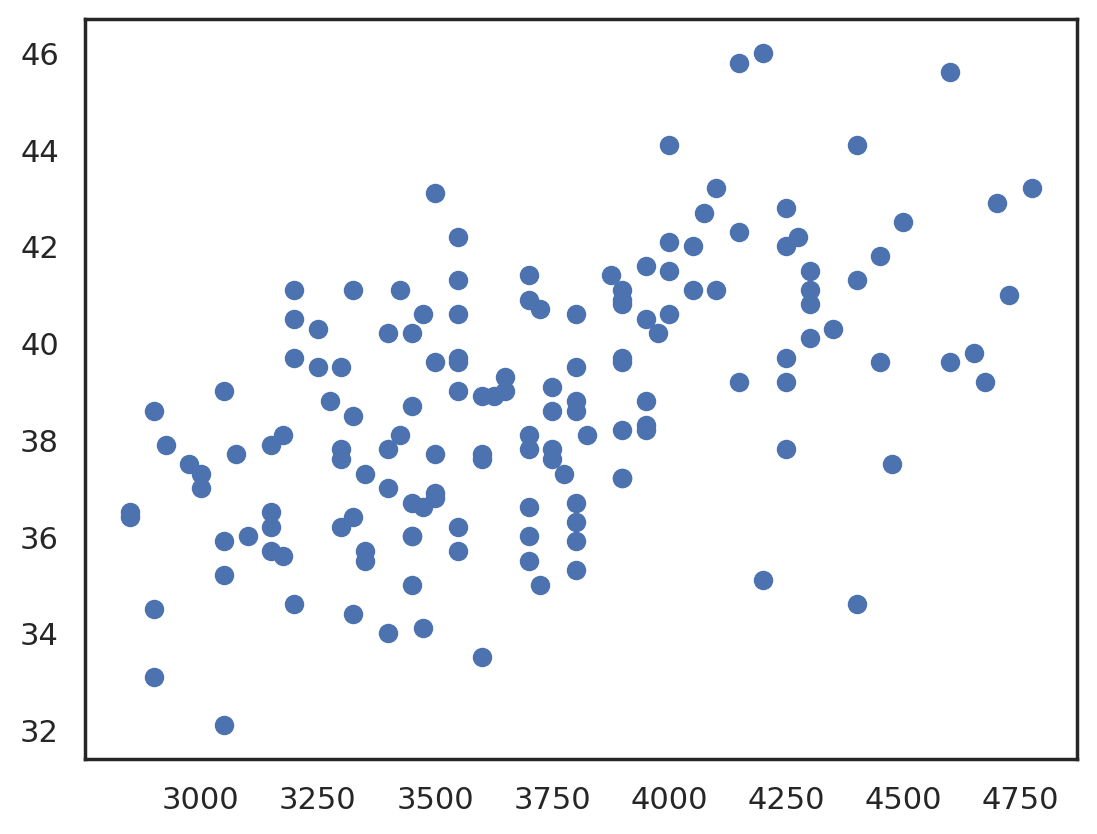

We can add a title, and axis labels.

We would like to plot all the penguins over the top of eachother.

First we make sure we have the Gentoo only data subset, then we make a new plot command under the first one.

### `16`

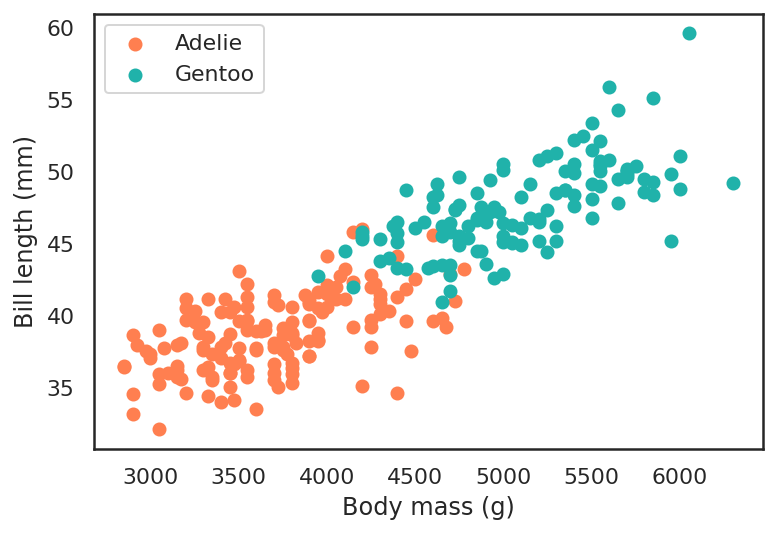

We used two different colours, I chose these colours from the matplotlib colour map. You can find a list of colours here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Now we can add the rest of the figure. This will include a legend.

**Important! This list of penguin names is in the same order as they were plotted.

---

## Exercise 02 -- Using Matplotlib

`5 mins`

*Create a scatter plot with all three penguins in different colours.*

`I will be recapping for loops in the next section. If this is very familiar to you, try the following instead of listening to the next section.`

**Advanced** *Create a for loop for this.*

**Super Advanced** *Create a function for this.*

---
And the answer is...

### `17`

Text(0, 0.5, 'Bill length (mm)')

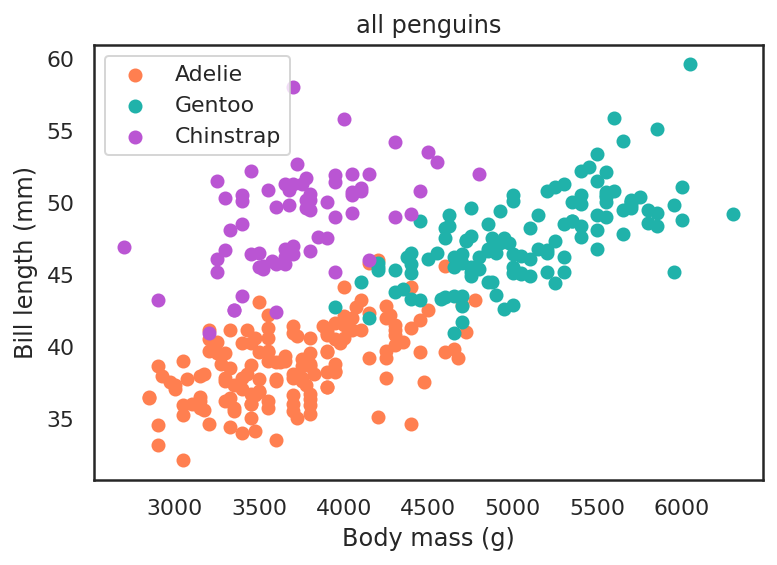

'coral'

# Loops for Plotting

![](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

We're copying and using code over and over again, which isn't usually a good plan. Mistakes are easy to make, and code will get very tedious if you need to repeat this 10 times or more!

We can use a for loop to repeat the same code over and over again. A for loop is a way of repeating a block of code a set number of times. Let's see an example below.

First we need a list of penguin species. We can write this manually, but we might not immediately know how many penguin species there are. This means we can get the computer to do this step for us.

### `18`

First we take the species column only, and then we use the method .unique() to find all the unique values. I want the answer to be a list, so I add another method on the end called .tolist().

We can chain methods like this to do multiple things in one line of code.

To recap, a for loop is a way to repeat a block of code a set number of times. Here is an easy example:

### `19`


We can modify this loop to help us plot all the species.

### `20`


We would like to make sure the colours are the same as we plotted before. To do this, we can use a Python Dictionary.

A dictionary is a way of storing data in a key-value pair. That way it will know what colour is associated with each species.

### `21`



The syntax is very particular here, but it means if we know the species name (key), we can look up the colour (value) in the dictionary.

It is similar to how our dataframe works when we call a specific column name in the square brackets.

### `22`

Now we can modify our loop from before. I will copy it into this cell and edit it here.

### `23`

---

## Exercise 03 Another Kind of Plot

`5 mins`

*Try to now plot some histograms for a given variable in the data frame with each species over the top of each other using a for loop.*

*Hint: You can make sure your histogram is slightly transparent by adding the argument alpha = 0.5.*

**Advanced** Create a function for your for plotting for loop.

**Super Advanced** Continue creating a function for your plotting loop. When done, save it as a function in a separate file, and try to call it into your main script.



---

And the answer is...

### `24`

# Subplots

![](https://matplotlib.org/stable/_images/sphx_glr_subplots_demo_005.png)

We can also use a for loop to plot subplots. This is a bit more complicated, but it's a good way to learn how to use subplots.

First we need to create a new figure with subplots. We can do this with the subplots() function. We need to tell it how many rows and columns we want. We can also tell it how big we want the figure to be. `Constrained_layout=True` will make sure the subplots don't overlap.

### `25`


(array([ 3., 12., 13., 30., 32., 39., 35., 18., 25., 17., 19., 22., 16.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2700., 2880., 3060., 3240., 3420., 3600., 3780., 3960., 4140.,
        4320., 4500., 4680., 4860., 5040., 5220., 5400., 5580., 5760.,
        5940., 6120., 6300.]),
 <a list of 20 Patch objects>)

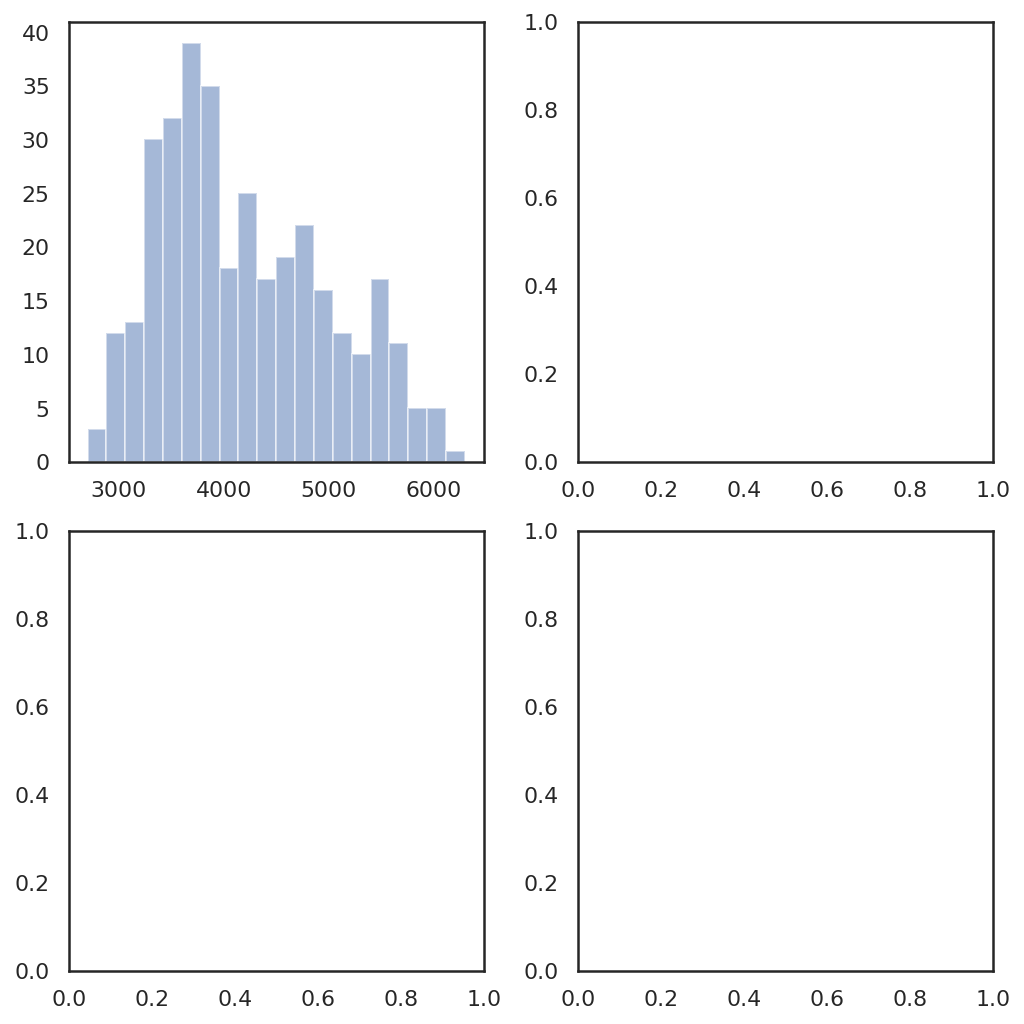

We have made two variables. One is called `fig` -- the figure itself. The `ax` variable is a list of the axes, each one is a subplot in a 2x2 formation.

The first top left subplot is `ax[0,0]`. The second top right subplot is `ax[0,1]`. The first bottom left subplot is `ax[1,0]`. The second bottom right subplot is `ax[1,1]`. Remember, python starts counting at 0, not 1.

The aim is to have 4 different plots in a 2x2 matrix, and each subplot will have each penguin species plotted in a different colour.

**If you are doing your own advanced exercises currently, please watch this part to understand how subplots work.**

We can use a for loop to plot the data for each species:


**Advanced people, I will now return to loops, so you can carry on as you were.**

You'll notice that we had some lines that were repeating throughout that loop. Which means we probably want a loop within our loop.

We're going to make a dictionary which contains the names of the variables we want to plot as they appear in the dataframe, linked with the name we want on the axis.

I will paste my code again and now edit it...

### `26`



Text(0.5, 1.0, 'all penguins')

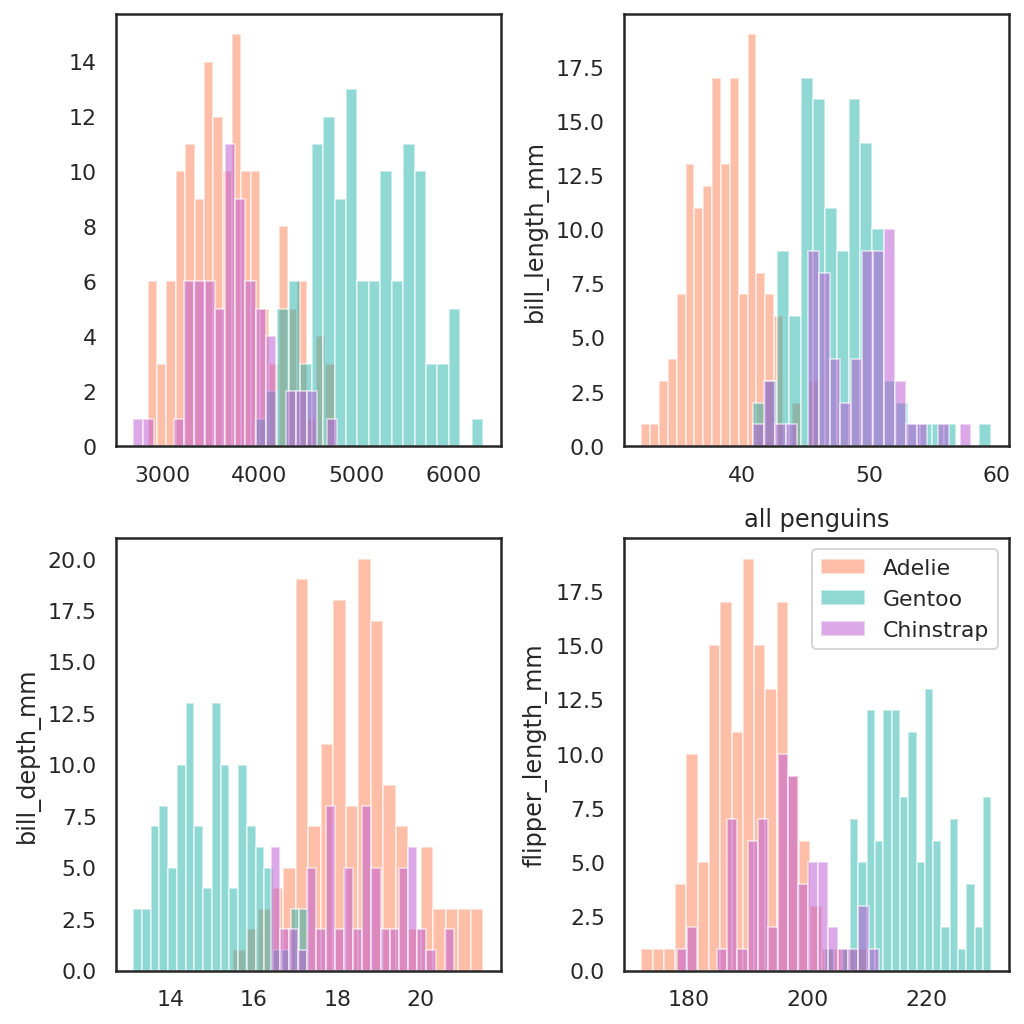

You can see that rather than those lines repeating, we've put them in a loop, even within the loop we already set up. This is much less likely to lead to mistakes.

Now we have understood figures with matplotlib, we have also looked at strings, lists, for loops, at conditional statements, and dictionaries.

---
## BREAK 10 MINS


- Check you have a subplot figure and a loop within a loop.
- Finish any of the exercises you are doing.

---


 # Statistical Tests

We have also done the first part of statistical analysis, which is data exploration. We can now do some statistical analysis.

First, lets run a T-test to see if there is a difference in mass between two species, Adelie and Gentoo.

We will need the scipy.stats library for this.

### `27`

Ttest_indResult(statistic=nan, pvalue=nan)


I'm going to use the `ttest_ind` function, an independent T-Test.

![](https://www.reneshbedre.com/assets/posts/ttest/ttest_teaser.webp)

### `28`

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


Oh no, it's not working.

Our dataset has some missing values. We can check it with the `.isna()` method.

### `29`


What I can do is then `.dropna()` function.


You'll notice we just replaced the penguins dataframe with a new one. That means we must remake the `adelie_body_mass` and `gentoo_body_mass`.


### `30`



Ttest_indResult(statistic=-23.466803147391744, pvalue=1.8806652580952688e-66)




### Best practices note!

This is exactly the scenario that leads to giant bugs in your code, and it is very easy to do this somewhere and lose track of what data you have dropped.

The best way to do this is to have a specific script that takes in raw_data.csv, then runs it through all the cleaning you want to do, and then at the end saves the data in `clean_data/` directory. You can then see what you have done and can exactly recreate it.

Your stats and other analyses can then load the clean data and continue in the pipeline.

<img src="https://i.imgur.com/AIwZP7a.png" alt="Drawing" style="width: 900px;"/>



## Back to the T-test...

### `31`

We can use the square brackets to access the results of our stats test. This is annoying for a few reasons. Firstly there are too many decimal places. Secondly it is in scientific notation which means it's hard to read quickly.

What we want is for the computer to summarise what we want to know.

# If Statements

![](https://imgs.xkcd.com/comics/p_values_2x.png)

**Advanced people, try to make a block of code that can read in `p-value` and print out whether it is significant, very significant, or not. We will need it later.**

The rest of us, lets try to go through the steps together as a recap of If Statements.

We use the word "if" to start the if statement. We're checking whether the statement that follows is true or not. If it is true, we do the code block that follows.

### `32`

p value is smaller than 0.05. Reject null Hypothesis


Another useful thing would be to still print the p-value, so we can see how close it is to the critical threshold, but not print a horrible number.


### `33`


Let me copy the code here:

Rather than having just two options, we can have as many as we want. We can use elif.

### `34`

## Exercise 04 - Printing P Values

`10 mins`

- *Make sure you have this part of the lesson working.*
- *Try a p_value of `0.5`. Can you fix the code?*

**Advanced people:** *Make this into a function.*

---

The answer is...

### `35`

# Making a Function

![](https://miro.medium.com/max/1400/1*_XTgZjwdU3Qq64NmU32xew.png)

**Advanced people, if you are happy with functions, try this part by yourself. Consider how to make them as generalisable as possible.**

Now we have a very useful block of code, we will definitely be reusing it. We need to make it into a function.

We use the word "def" to define a function. We then give it a name, "p_value_to_words". When defining the function, we put an input in brackets to tell it what the function is expecting.

### `36`

*** The p-value is smaller than the critical value. P value is < 0.001 ***


Now we have defined our function... Nothing happens. We need to actually call it for something to happen.

### `37`

You should make a function whenever you write a useful block of code. A function should do one thing, and one thing only.

### Best Practices Note!
When you make a function, it is an excellent idea to make it as generalisable as possible. That way you don't have duplicate, very similar code all over the place. If you have 5 versions of the same function, it can be difficult to fix bugs and spot problems.

The best thing to do is to write your functions to their own specific python file. `functions/` subdirectory is a place to store all the useful tools you've created for your project, and you can call them in scripts.

For example, if you have a file that is running T-tests on mass, and then another file that does mixed effects modelling, you can store your function in a separate place. Both files want to check p values, and so they can then refer to the external function.

If you later find a problem in your function, you don't have to hunt down every erroneous copy of your code across all your files.

We are working in a notebook so this is even more important! Notebooks are almost impossible to do proper version control.

---


## Exercise 05 -- Function P Value Results

`5 mins`

- *Make sure you have a function working*
- *Try calling it with different values*

---



# T-test Loop

We can now make a loop to run the T test and compare each and every species. I am going to build this block of code slowly, so you can see how it works when you're coding to solve a problem.

### `38`

# ANOVA and Categories

![](https://3.bp.blogspot.com/-PDWTzbbwx54/XEbYzExO9rI/AAAAAAAAAAM/AOvAPbXYVUcxmVKnWWrtQaiZ0qhIHo9vwCLcBGAs/s1600/ANOVA.png)

We have been subsetting the data by using species == statement, but a lot of functions that work with pandas can be given a column of categorical data and will distinguish between the groups.

### `39`


3.74450512630046e-81
341.89489494814615
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj   lower     upper   reject
--------------------------------------------------------------
   Adelie Chinstrap   26.9239   0.9 -132.3606  186.2083  False
   Adelie    Gentoo 1386.2726 0.001 1252.2832  1520.262   True
Chinstrap    Gentoo 1359.3487 0.001 1194.4223 1524.2751   True
--------------------------------------------------------------


The last section was a helpful reminder of how to use loops, but we can use ANOVA when we want to do lots of T-tests.

We can use the `ols()` function to do an ANOVA. We need to tell it the formula we want to use. OLS means ordinary least squares.

We can use the `~` to tell it we want to compare the two groups.

We can use the `C()` function to tell it that the column is categorical data.

The `fit()` function fits the model to the data.

### `40`



Remember our p-value function? We can also use it here.

However, the p value only tells us there is an effect, not which species are different. For that we need a post-hoc test -- the Tukey HSD test. We use the Multicomparison library for this.

Here, false in the final column means no statistically significant difference between them.

### `41`

# Regression

![https://miro.medium.com/max/1200/1*N1-K-A43_98pYZ27fnupDA.jpeg](https://miro.medium.com/max/1200/1*N1-K-A43_98pYZ27fnupDA.jpeg)

We can also fit other models to the data. For example, a linear model. Regression is where we test a hypothesis about the relationship between two variables.

First, lets explore the relationships between all the variables.

This is called a pair plot, give it a try (it will take a little longer to run).

### `42`

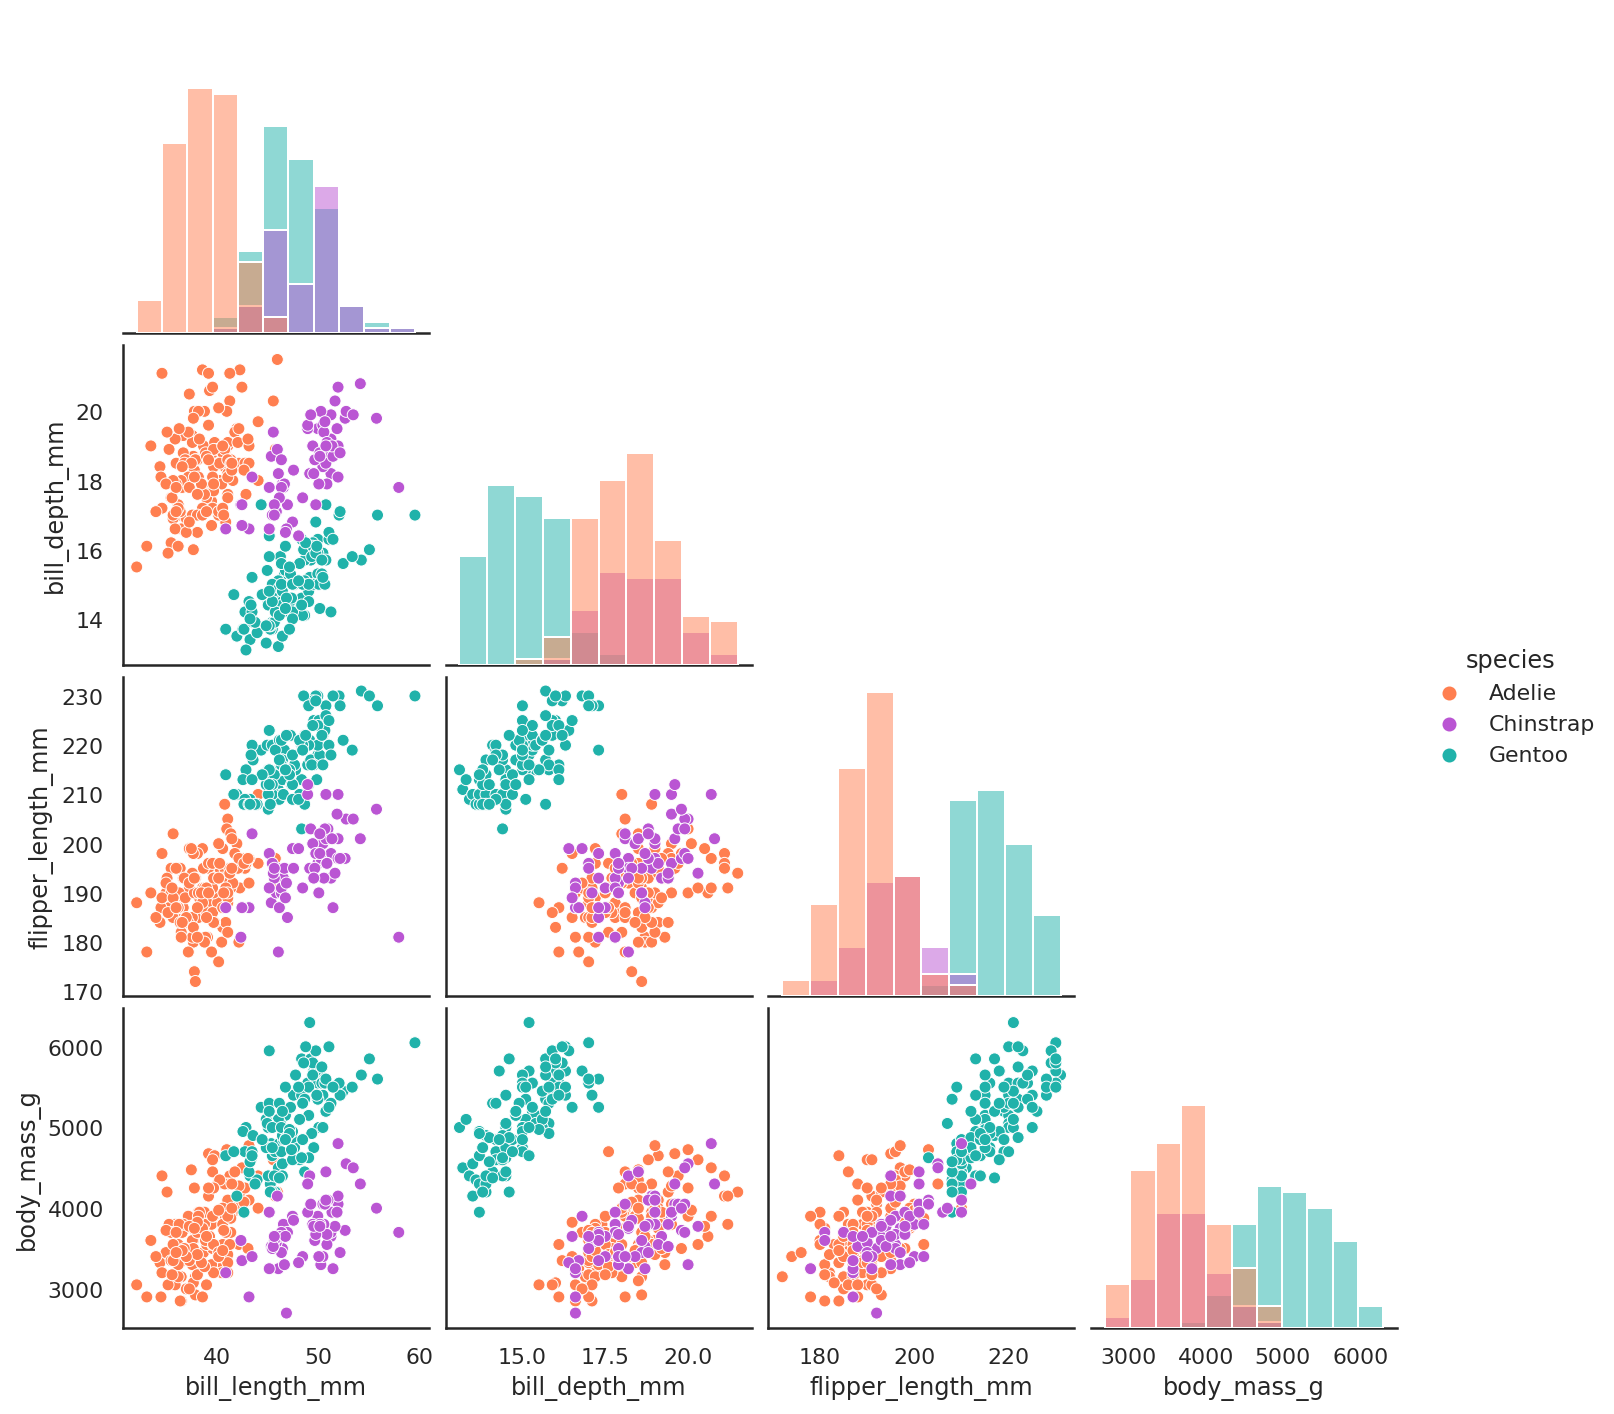

# Linear Regression

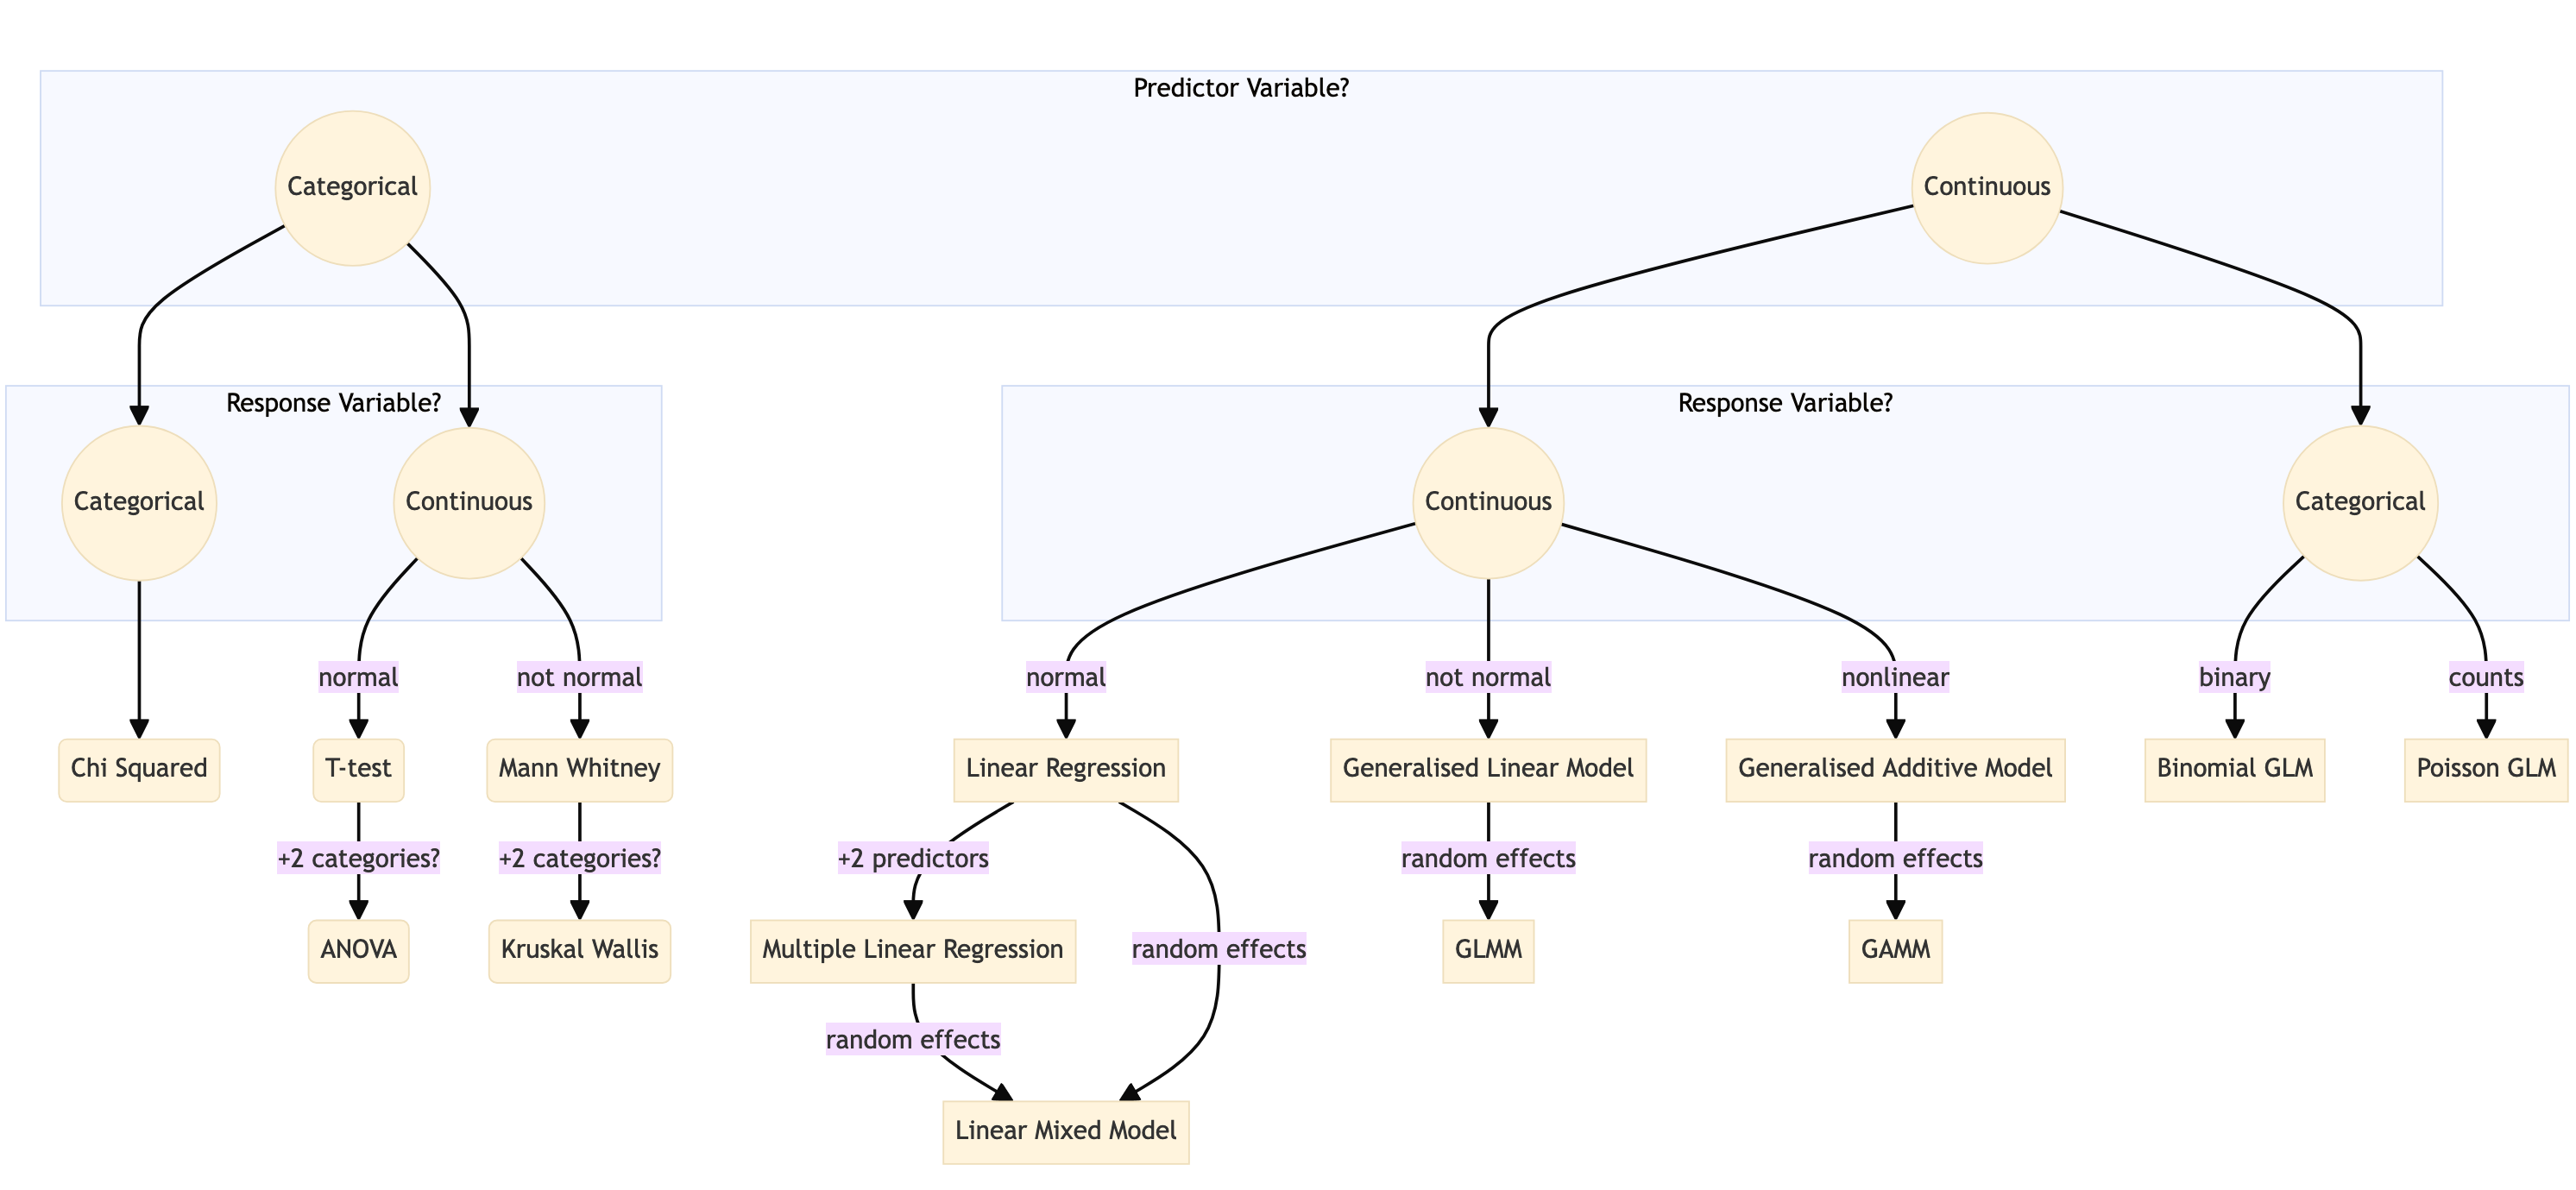


We can use the ols() function to fit a linear model. We need to tell it the formula we want to use.

(Fun fact, that's because we're using OLS for generalised linear models, and ANOVA is actually a regression.)

Here we can run the model on the data and print the results...

### `43`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.54e-32
Time:                        12:08:08   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or if we just want to look at individual results:

### `44`


##  How to intepret these results

The model coefficient is the slope of the line -- how much the body mass changes for each unit change in bill length. So for every mm increase in bill length, the body mass increases by Xg.

The intercept is the y intercept of the line -- the body mass when the bill length is 0 (Xg).

It would be nice to plot our linear regression results.

We can use the seaborn library to do this. We can use the lmplot() function to plot a linear regression.

### `45`





However, we know there are 3 species in this data set.

First, let's put our linear model into a generalisable function.

---

## Exercise 06 -- Linear Model Function

`10 mins`

- *Put Linear Model in a function*
- *Nest the printing p value function inside.*

**Advanced People** -- *Make the function generalisable for both linear regression and multiple linear regression.*

**Super Advanced People** -- *Find out how to run blocks of R code, or an R script, within Python.*

---

Here's our function and loop for each species...

### `46`

# Plotting Linear Regression

It would be nice to plot our linear regression results. We can use the seaborn library lmplot() function.

### `47`



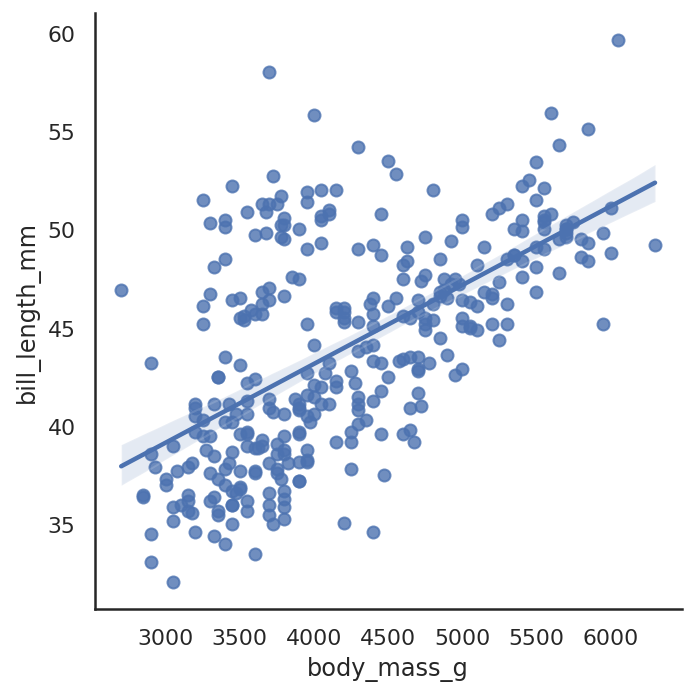

Now we should split by species.

### `48`

For fun I'm going to add another function.

This one makes asterisks depending on the P value.

The finished code:

### `49`

# Linear Mixed Effects Model

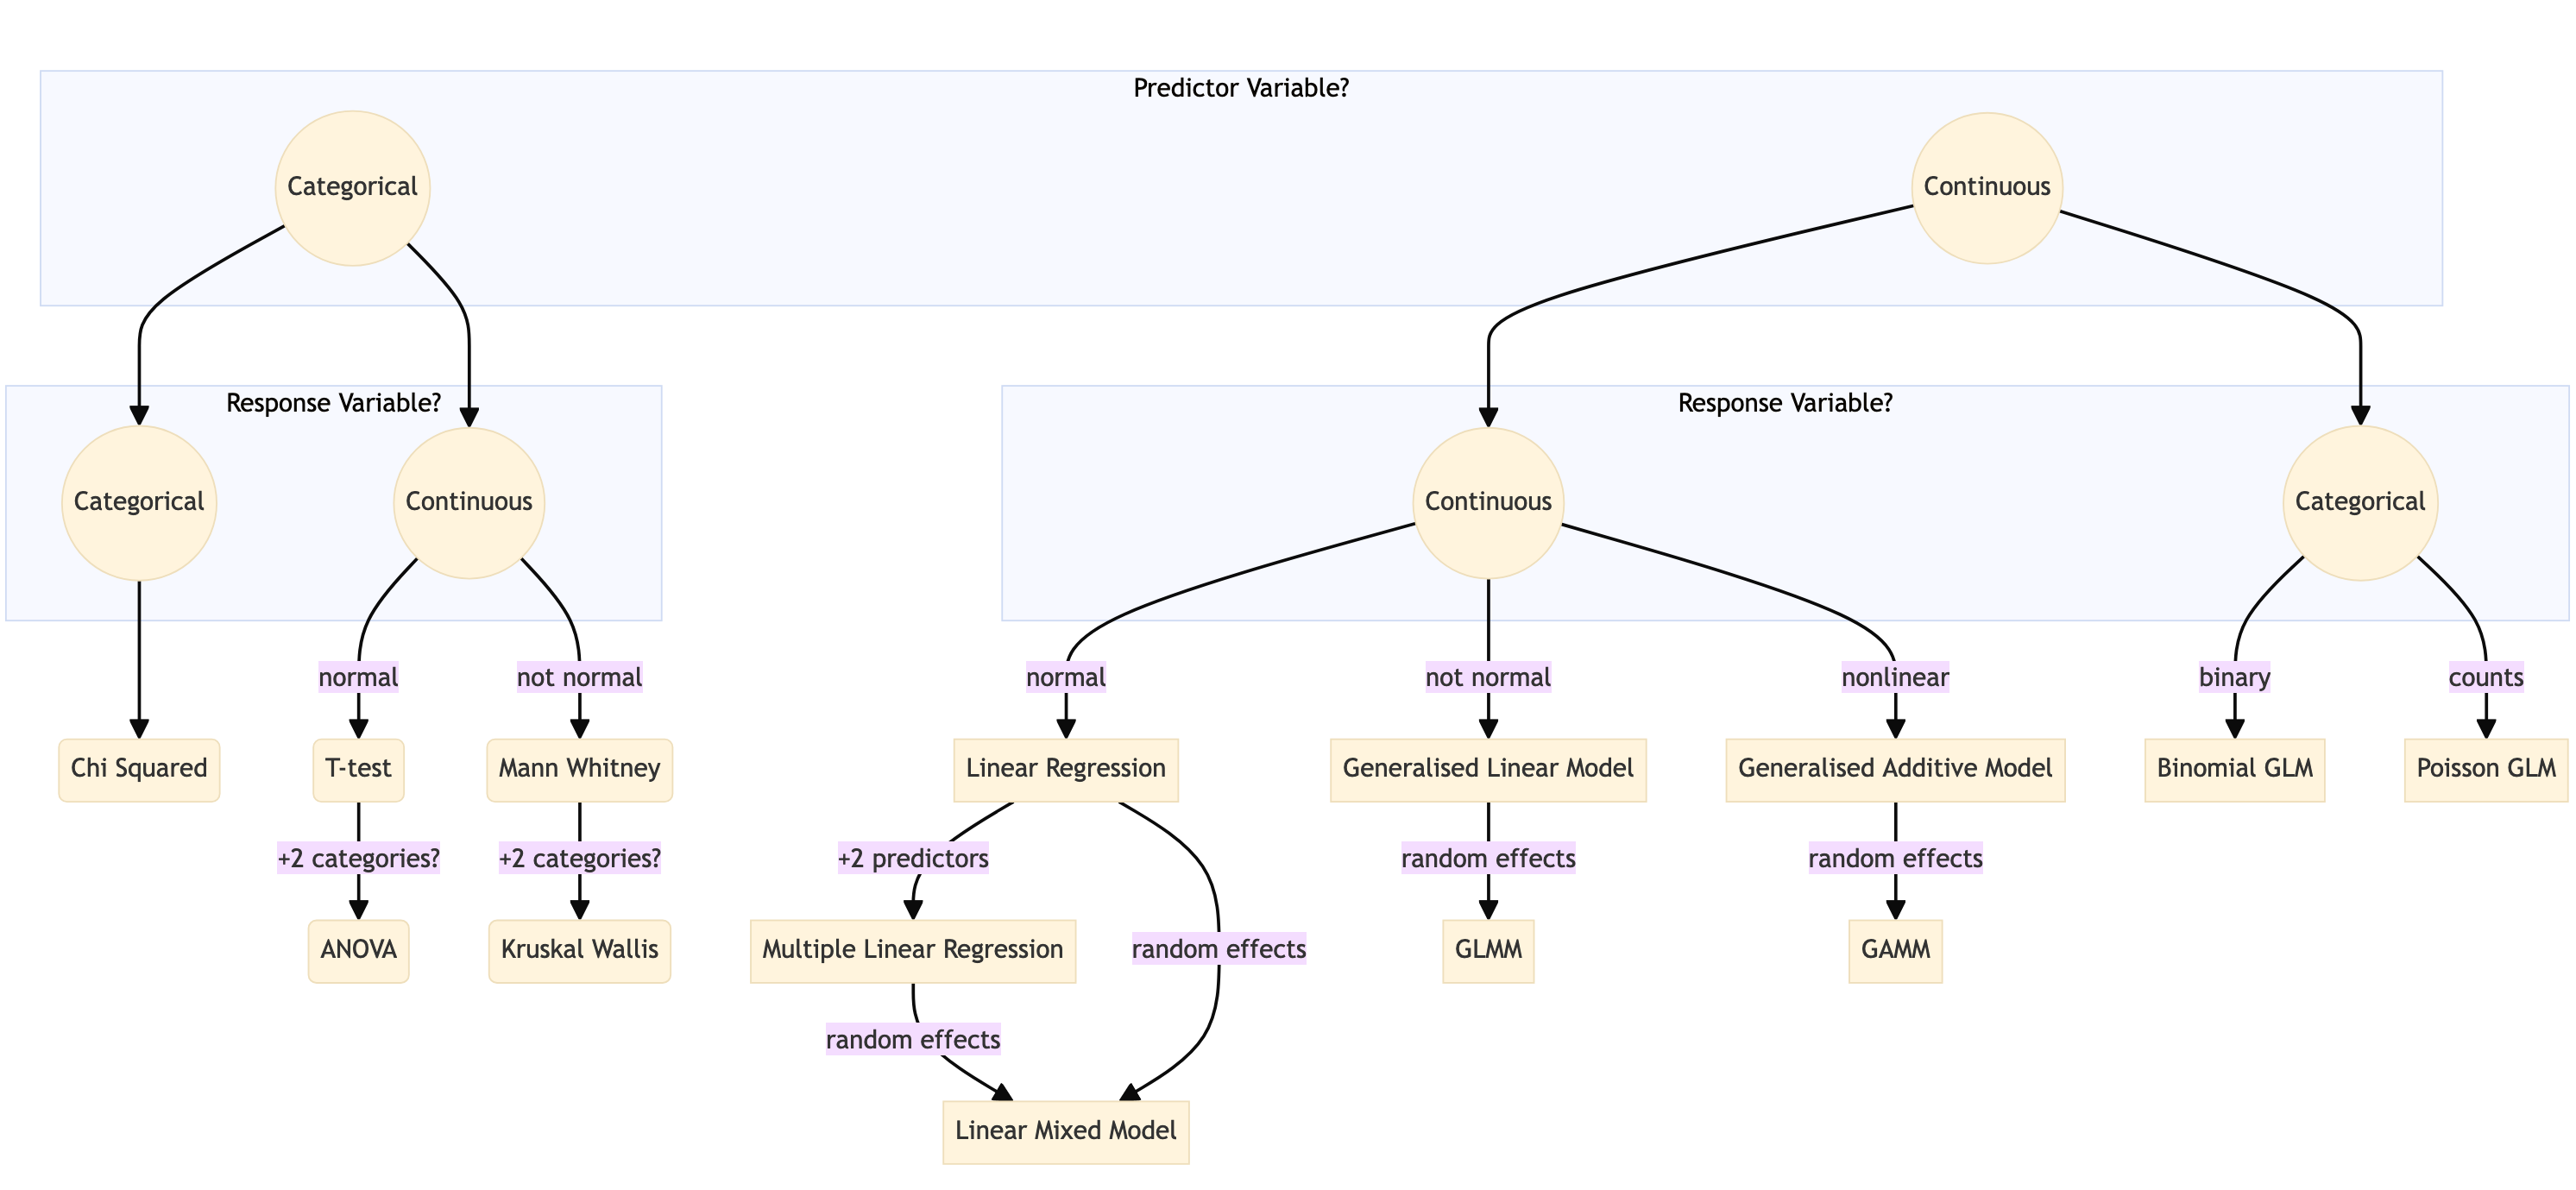

Now we can try and add in random effects. First we will try:

## Random Intercept Model

Each species gets a different intercept, but the slope is the same.

### `52`

We can put these results in a dataframe:

### `53`


And now plot the results:

### `54`


A different mixed effects model is...

## Random Slope Model

Each species gets a different slope, but the intercept is the same.

### `55`

# Multiple Linear Regression

This is a more complex model. If we ignore the species...

### `56`


## What are we testing here?

We are predicting body mass from bill length and flipper length.
The results show us for example, that if we control for flipper length, a 1mm increase in bill length is associated with a 4.9g increase in body mass.
Controlling for bill length, a 1mm increase in flipper length is associated with a 48g increase in body mass.

There's also a t test for each variable. This is testing if the variable is significantly associated with the body mass.

We can see bill length is not significant, but flipper length is.

Finally we can look at the R squared value. This is the proportion of the variance in body mass that is explained by the model.

This is a very high value, so we can say that the model explains a lot of the variance in body mass.

The more variables we add, the higher the R squared will be, and the more overfitted our model will be.

We can also look at the adjusted R squared value. This is the proportion of the variance in body mass that is explained by the model after accounting for the number of variables in the model.

We can also look at the p value for the F test. This is testing if the model is significantly better than a model with no variables.

We can see that the model is significantly better than a model with no variables (phew).



# Making Predictions

Now we have our model, we can make a prediction. We can predict the body mass of a penguin with a bill length of 40mm and a flipper length of 200mm.

`57`

Lets guess a really big penguin.

### `58`


# Training versus Testing Data

![](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/15185319/blogs-15-7-2020-02-1024x565.jpg)

This ability to predict gives us a very special ability to test our hypotheses.

We can create a model using most of the data, and then test it on the remaining data.

We will need some new libraries.

### `59`

We can use the train_test_split() function to split our data into a training set and a test set.

### `60`

We can then use the training set to create a model.

### `61`


We can then use the test data to test the model.

### `62`

We can then compare the predicted values to the actual values.

### `63`


We can then plot the predicted values against the actual values.

### `64`

We can then calculate the R squared value for the test set.

### `65`

# Machine Learning

This is the beginnings of the workflow used in machine learning. We can use this to test our models and see how well they perform. In reinforcement learning, the model alters itself based on how accurate it is.




# Optional Extras




## Logistic Regression

We can create a logistic regression model to predict species from bill length and flipper length.

### `66`